In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact

In [ ]:
df = pd.read_csv('smoking_train.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,yes
1,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,no
2,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,no
3,5,M,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,no
4,6,M,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44554 non-null  int64  
 1   gender               44554 non-null  object 
 2   age                  44114 non-null  float64
 3   height(cm)           44554 non-null  int64  
 4   weight(kg)           44510 non-null  float64
 5   waist(cm)            44554 non-null  float64
 6   eyesight(left)       44554 non-null  float64
 7   eyesight(right)      44554 non-null  float64
 8   hearing(left)        44554 non-null  float64
 9   hearing(right)       44554 non-null  float64
 10  systolic             44554 non-null  float64
 11  relaxation           44554 non-null  float64
 12  fasting blood sugar  44554 non-null  float64
 13  Cholesterol          44554 non-null  float64
 14  triglyceride         44554 non-null  float64
 15  HDL                  44554 non-null 

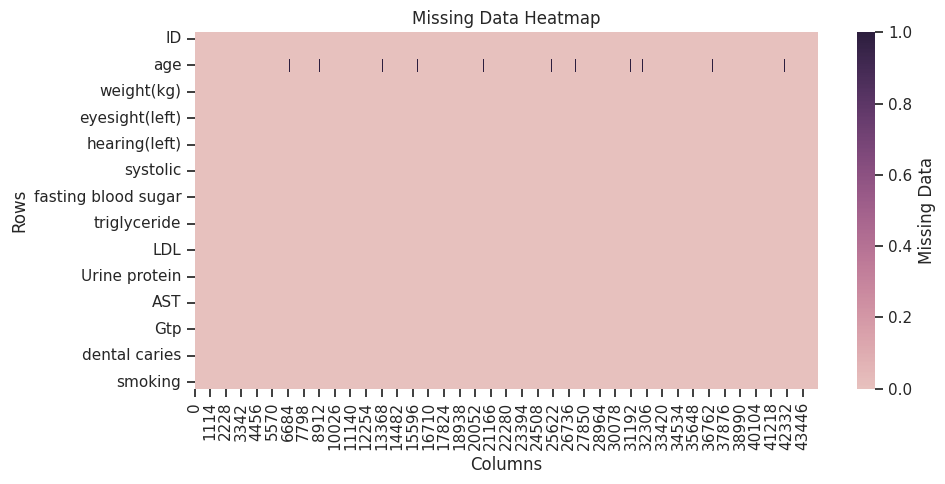

In [ ]:
# Создание экземпляра фигуры и осей для лучшего контроля и получения возможности изменять определенные свойства графика
fig, ax = plt.subplots(figsize=(10,5))

cmap = sns.cubehelix_palette(as_cmap=True, light=.8)

# Создание тепловой карты
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Missing Data'}, ax=ax)

# Настройка осей
ax.set_title('Missing Data Heatmap')
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')

# Автоматически настраивайте макет подзаголовка для лучшей видимости
plt.tight_layout()

plt.show()

In [ ]:
df_nan = df.loc[:, df.isnull().any()]
df_nan.isnull().sum() / len(df_nan) * 100 # Процент пропущенных значений

age           0.987566
weight(kg)    0.098757
dtype: float64

Заполним эти пропуски модой столбца.

In [ ]:
# код заполняет все пропущенные значения в каждом столбце DataFrame df наиболее часто встречающимся значением (модой) для этого столбца.
for col in df.columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [ ]:
df['oral'].value_counts()

Y    44554
Name: oral, dtype: int64

In [ ]:
df = df.drop('oral',axis=1) # т.к. только значения Y
mapping = {
    'M': 1,
    'F': 0,
    'Y': 1,
    'N': 0,
    'yes': 1,
    'no': 0
}

df.replace({'gender': mapping, 'tartar': mapping, 'smoking': mapping}, inplace=True)
df = df.astype({"gender": "Int64", "smoking": "Int64", "tartar": "Int64"})

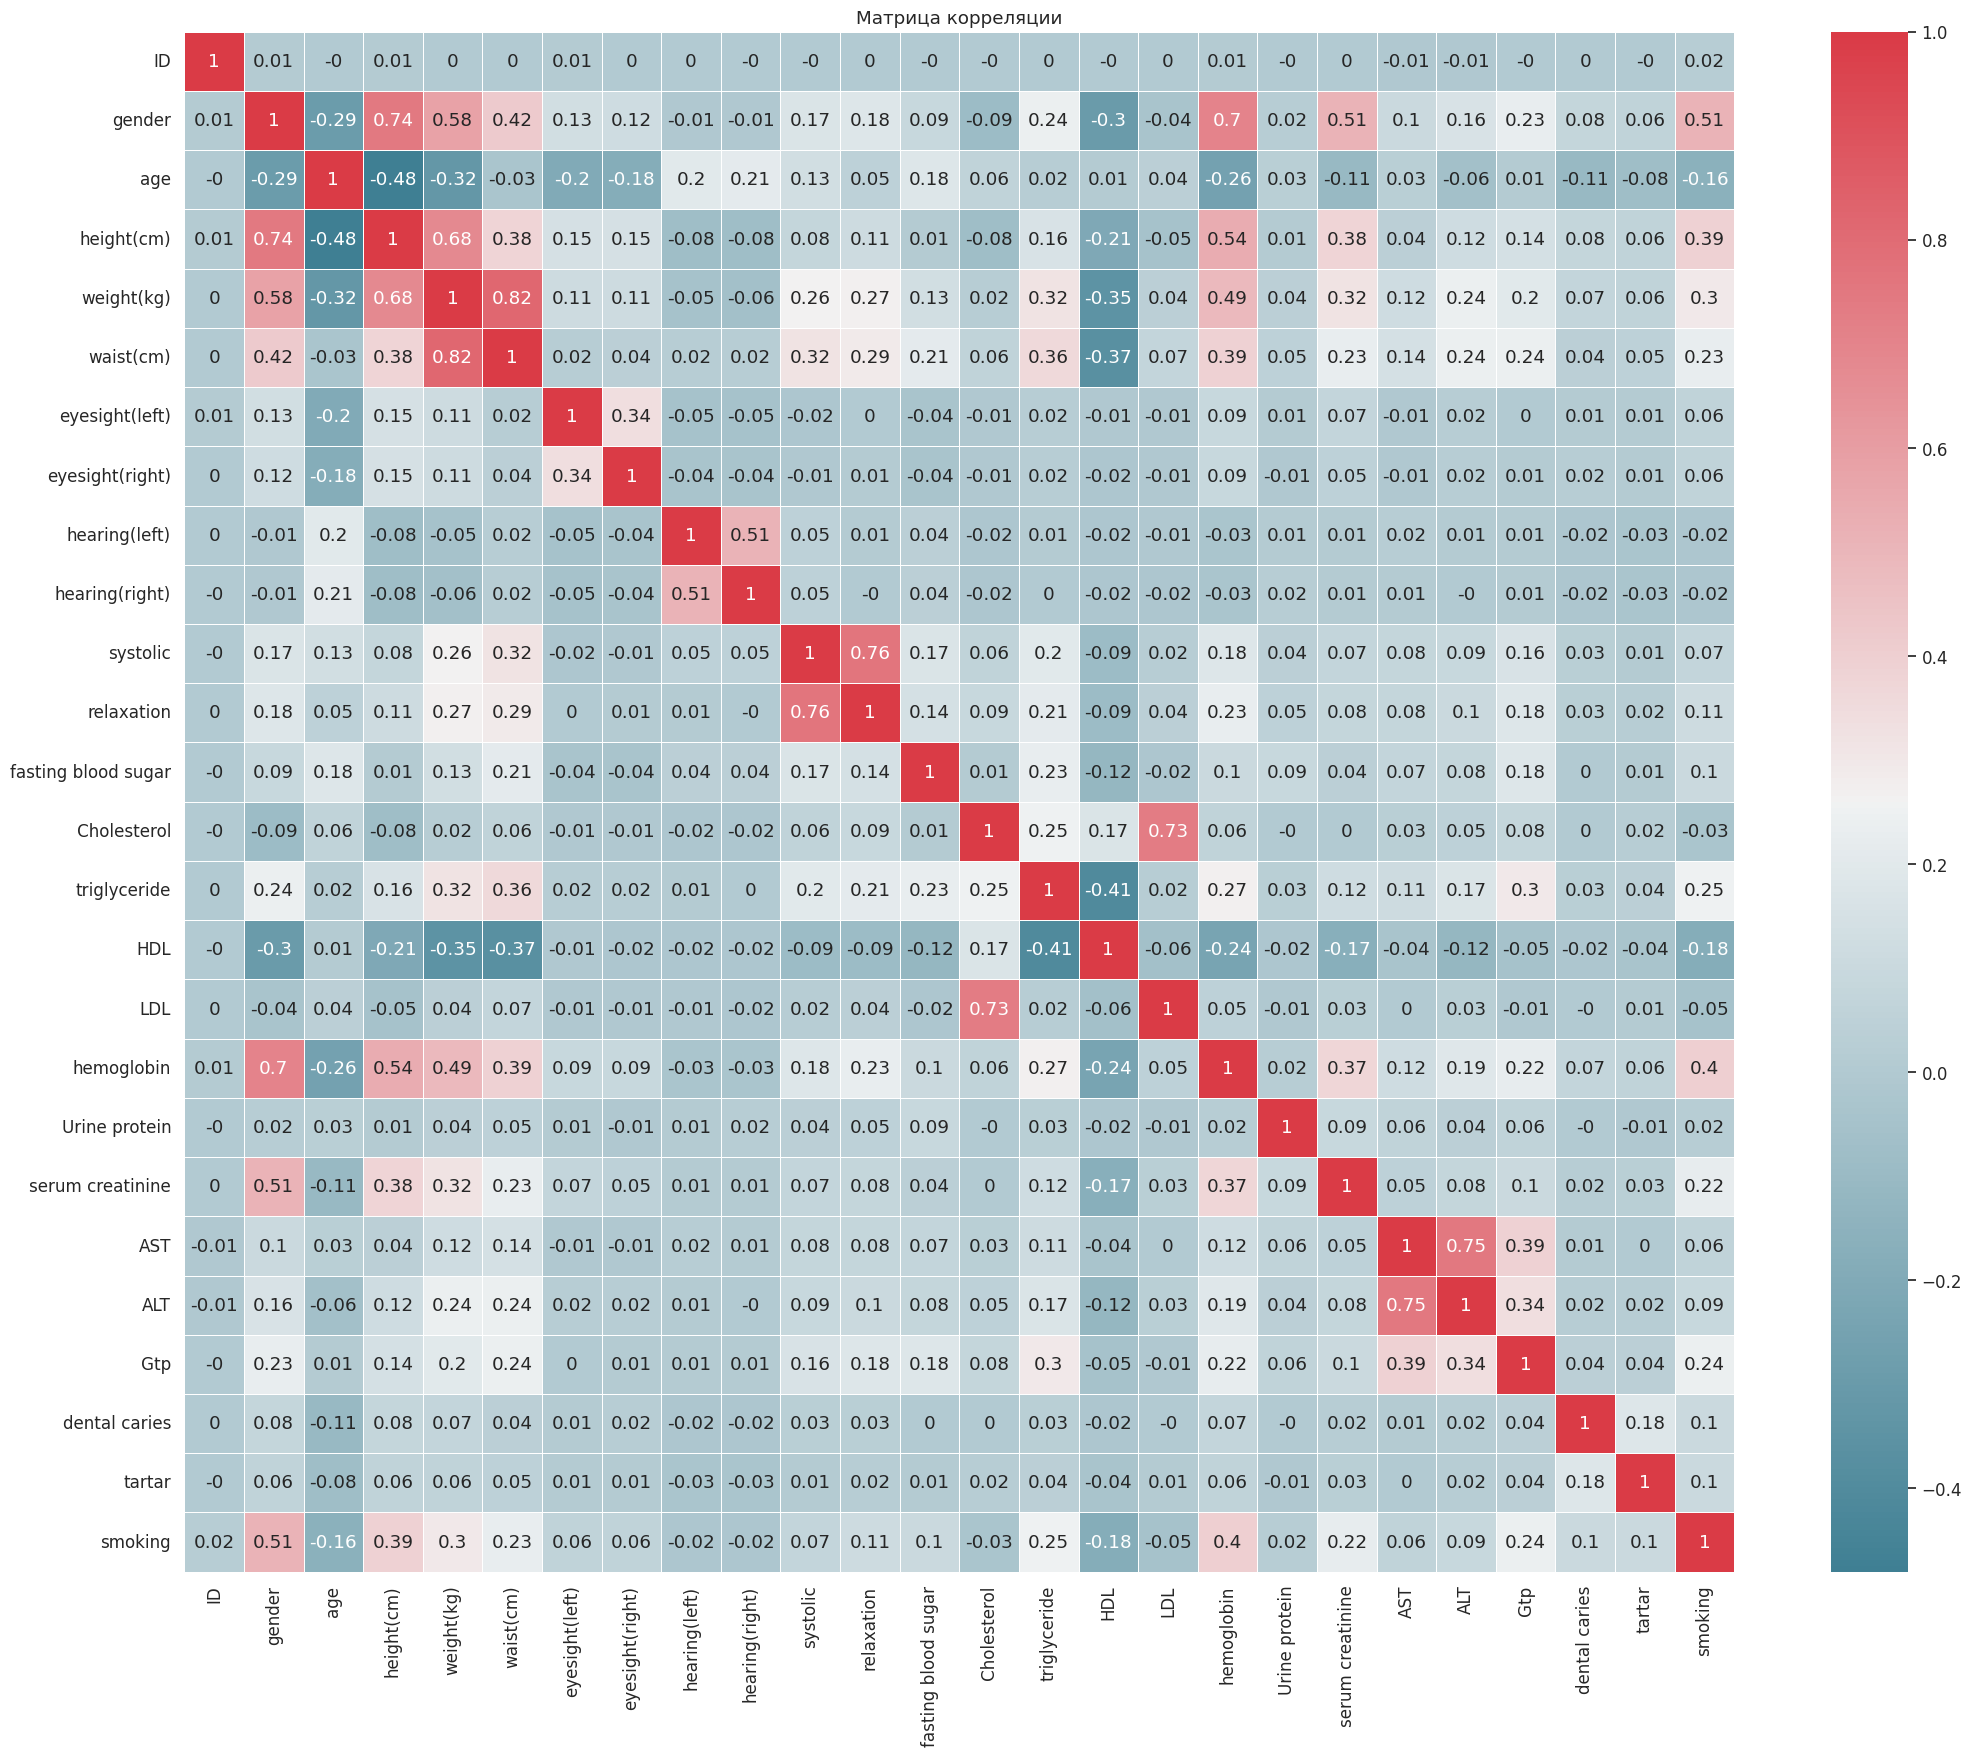

In [ ]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)

custom_cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap=custom_cmap)

plt.title('Матрица корреляции')
plt.show()

In [ ]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,2,1,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
1,3,1,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
2,4,0,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
3,5,1,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,...,129.0,16.2,1.0,1.2,18.0,27.0,33.0,0,1,0
4,6,1,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,...,157.0,17.0,1.0,0.7,21.0,27.0,39.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44549,55673,0,60.0,150,50.0,75.0,1.0,1.2,1.0,1.0,...,116.0,12.6,1.0,0.8,26.0,21.0,14.0,0,1,0
44550,55681,0,45.0,160,50.0,70.0,1.2,1.2,1.0,1.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
44551,55683,0,55.0,160,50.0,68.5,1.0,1.2,1.0,1.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
44552,55684,1,60.0,165,60.0,78.0,0.8,1.0,1.0,1.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


In [ ]:
categories = df.columns.tolist()
categories = categories[1:]
categories

['gender',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'tartar',
 'smoking']

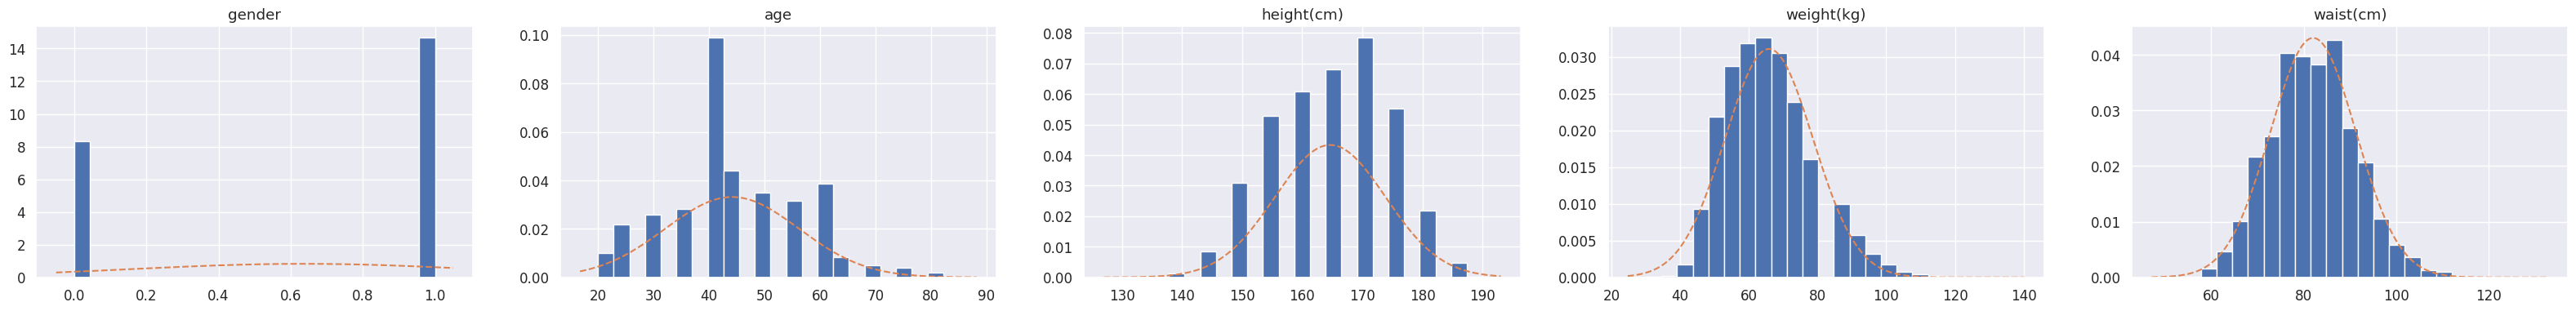

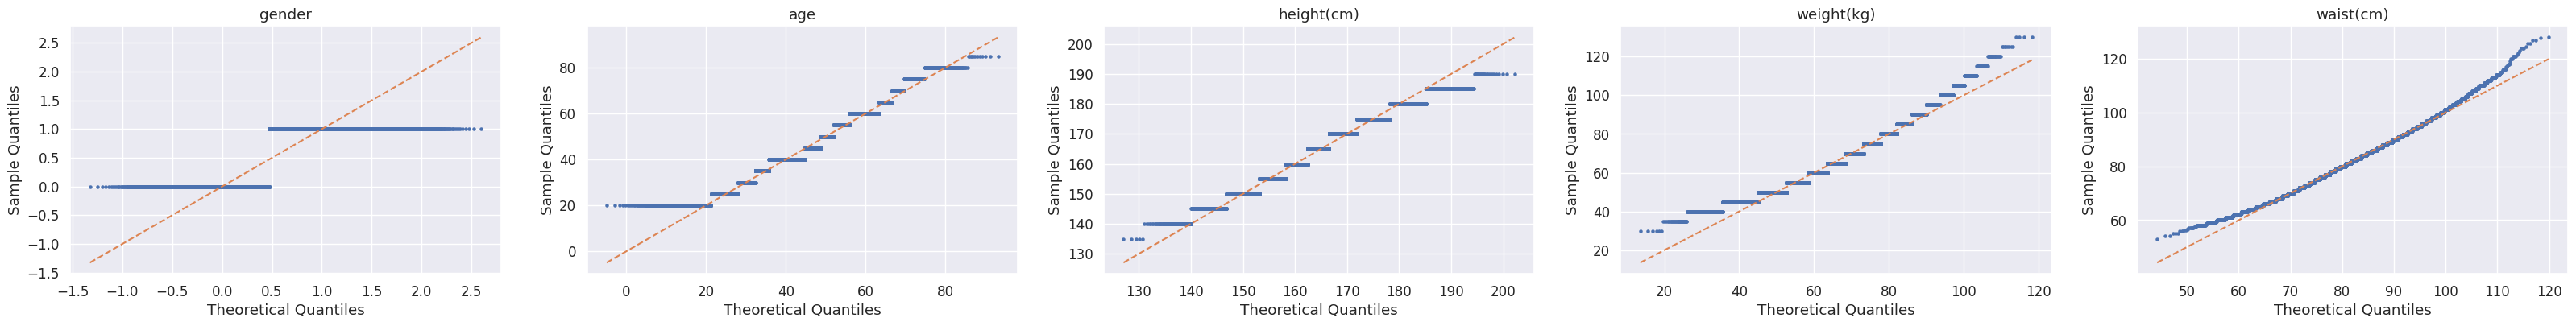

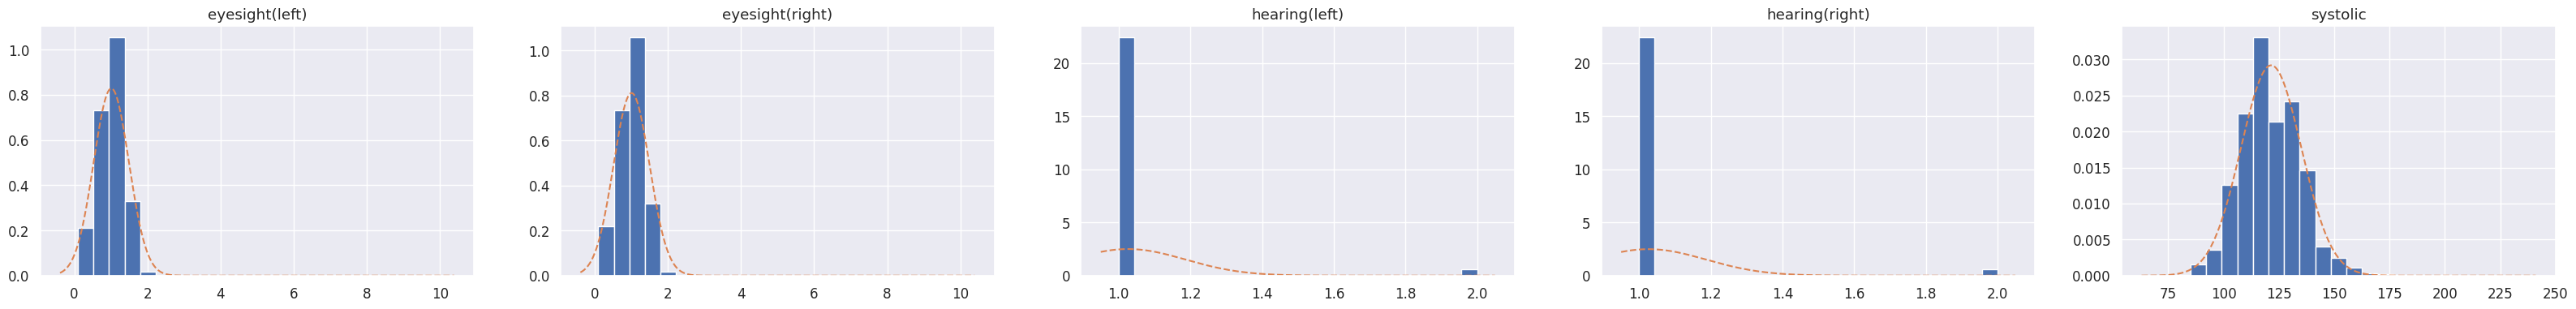

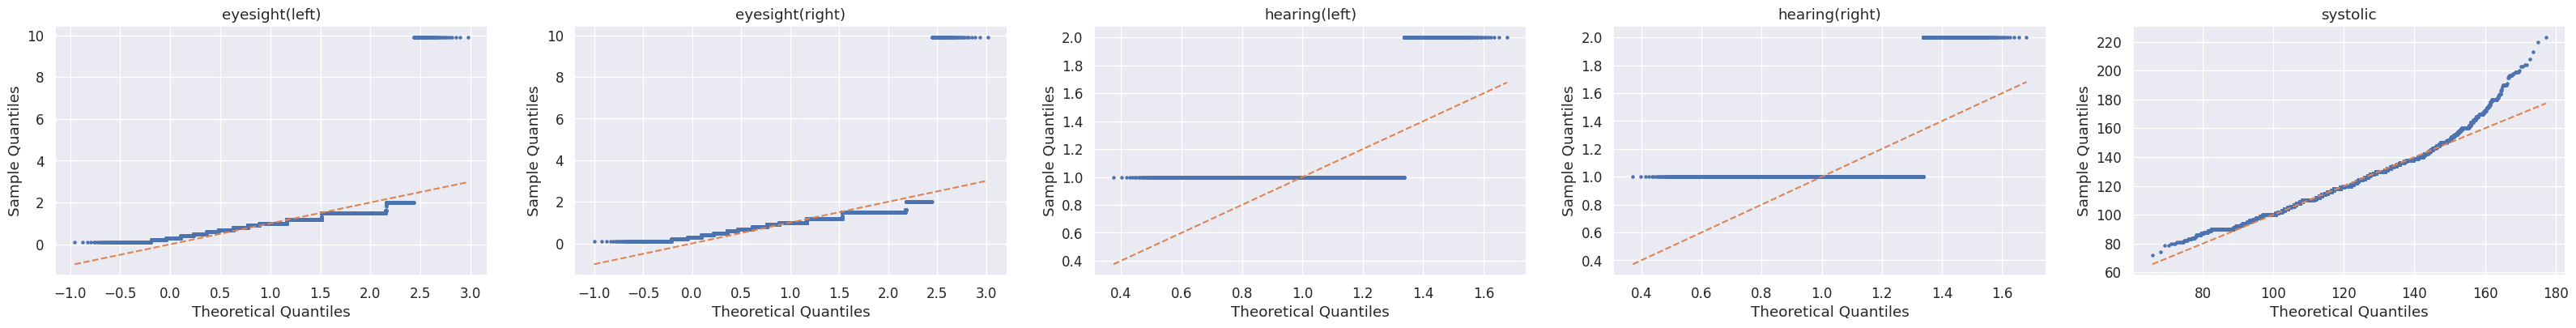

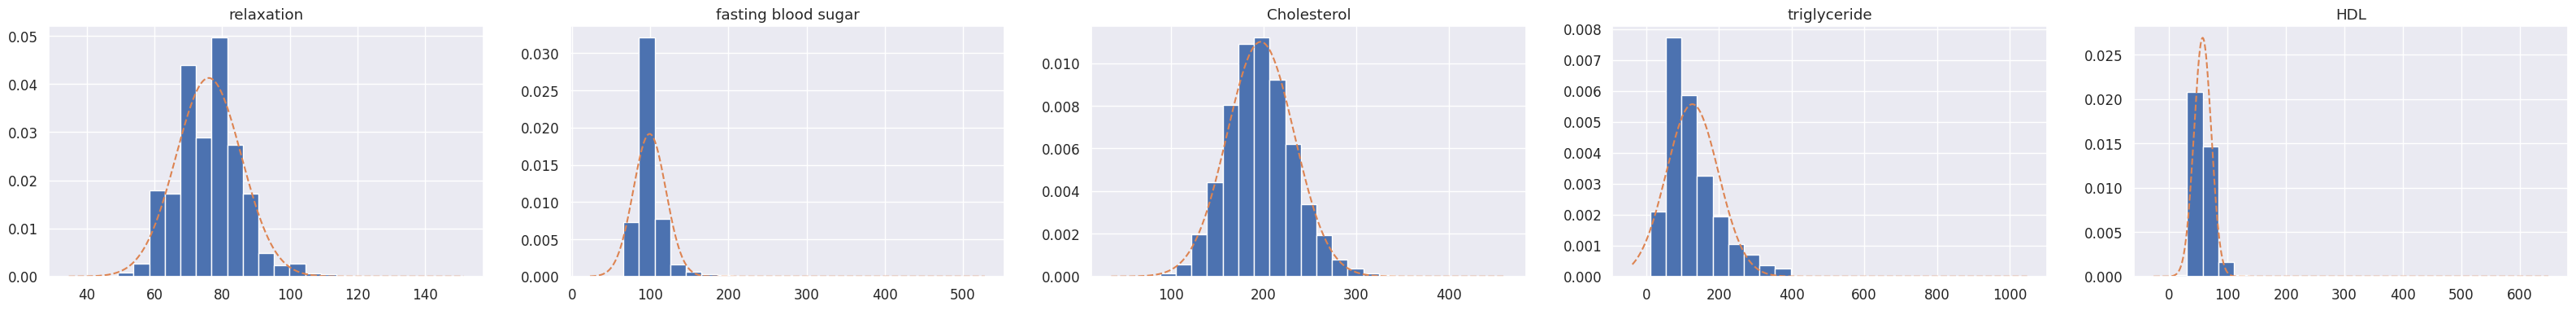

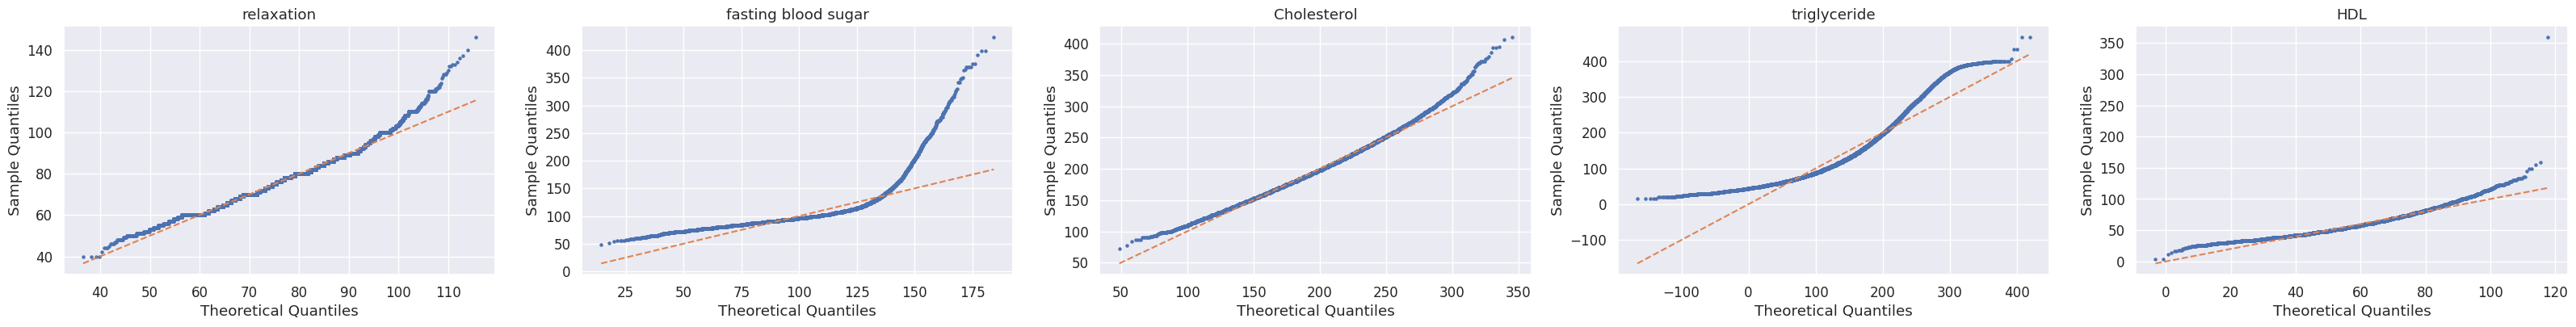

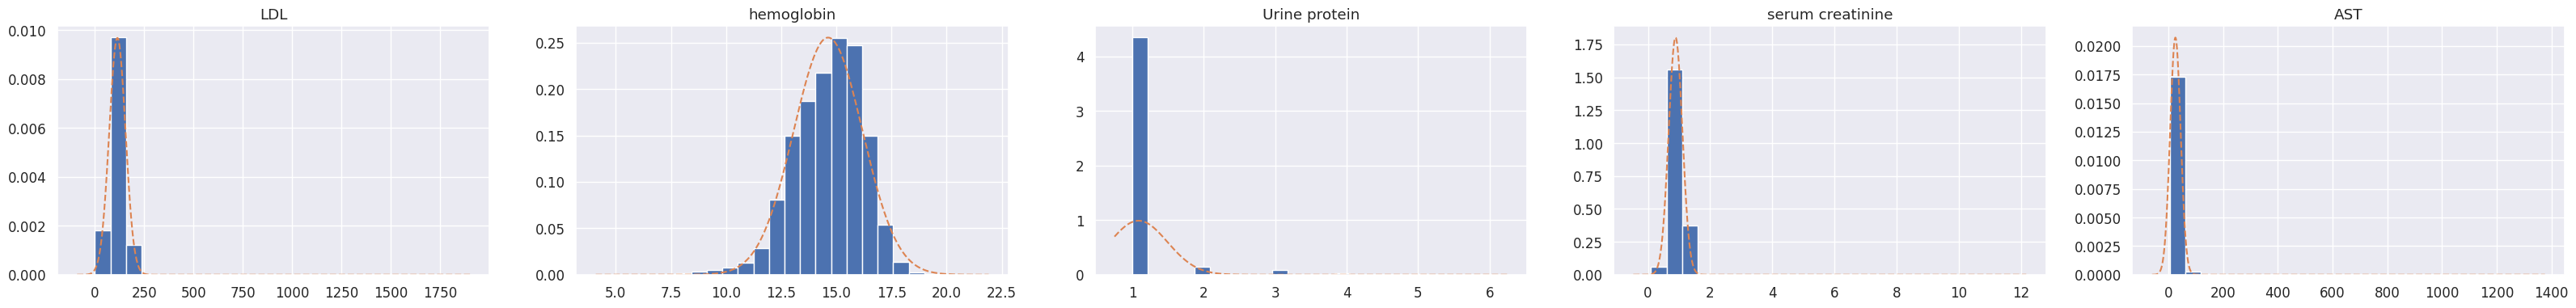

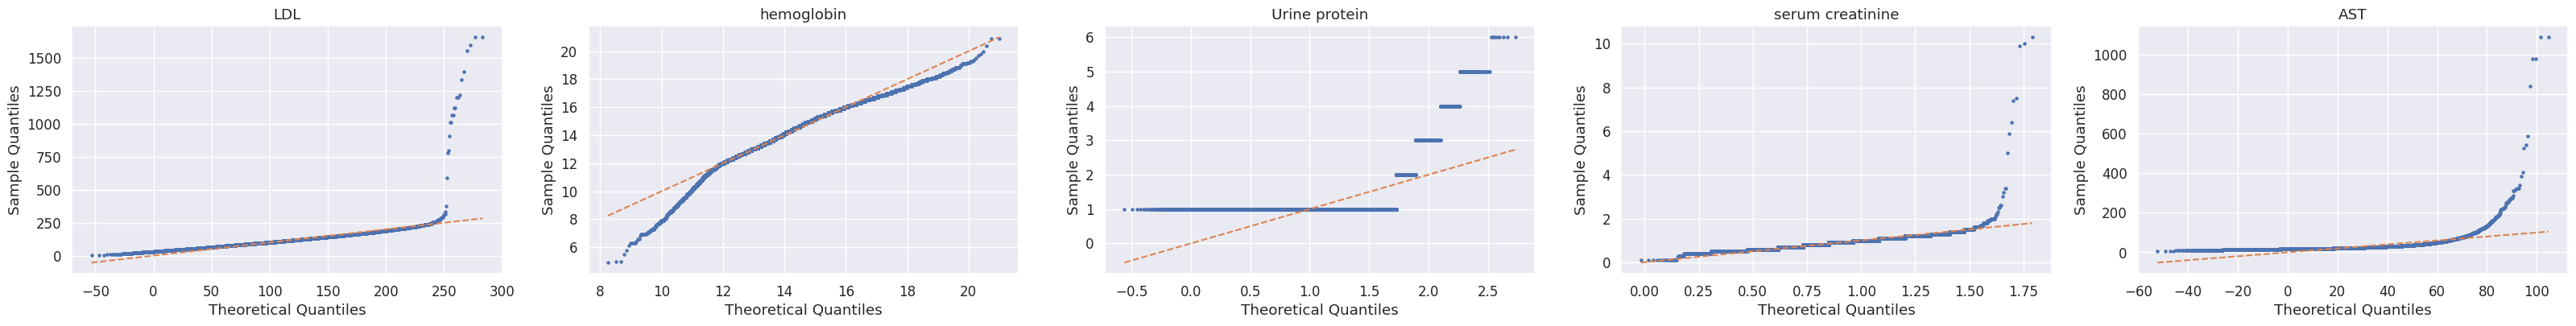

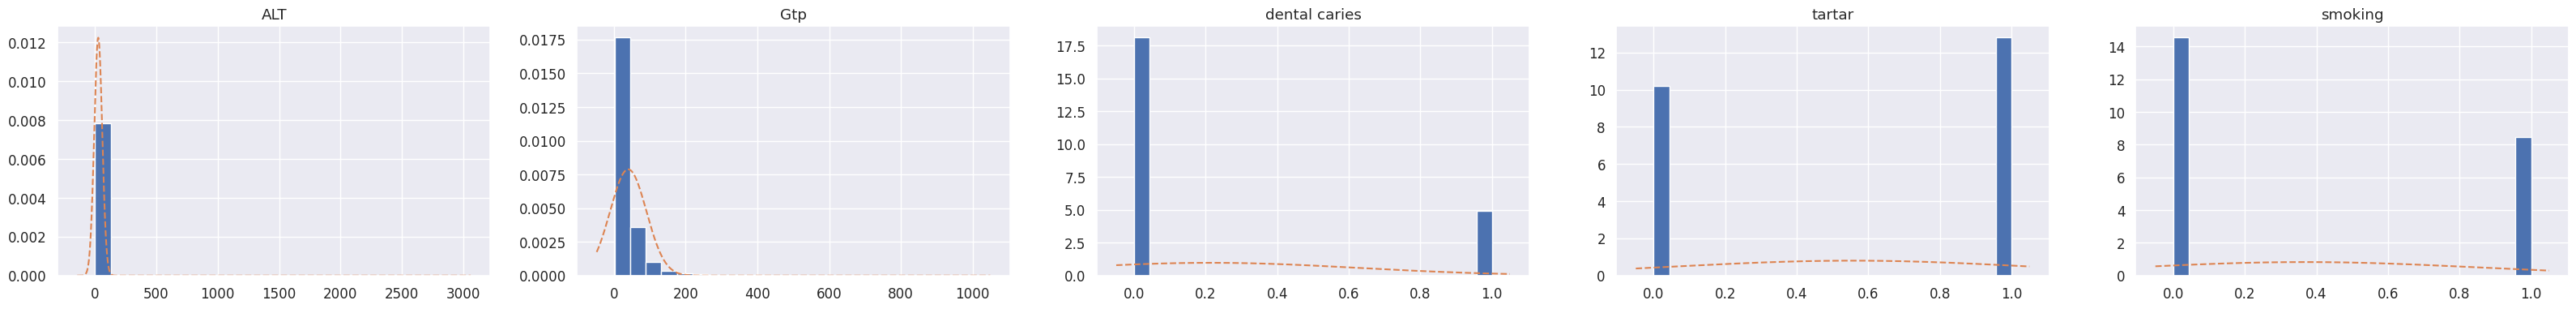

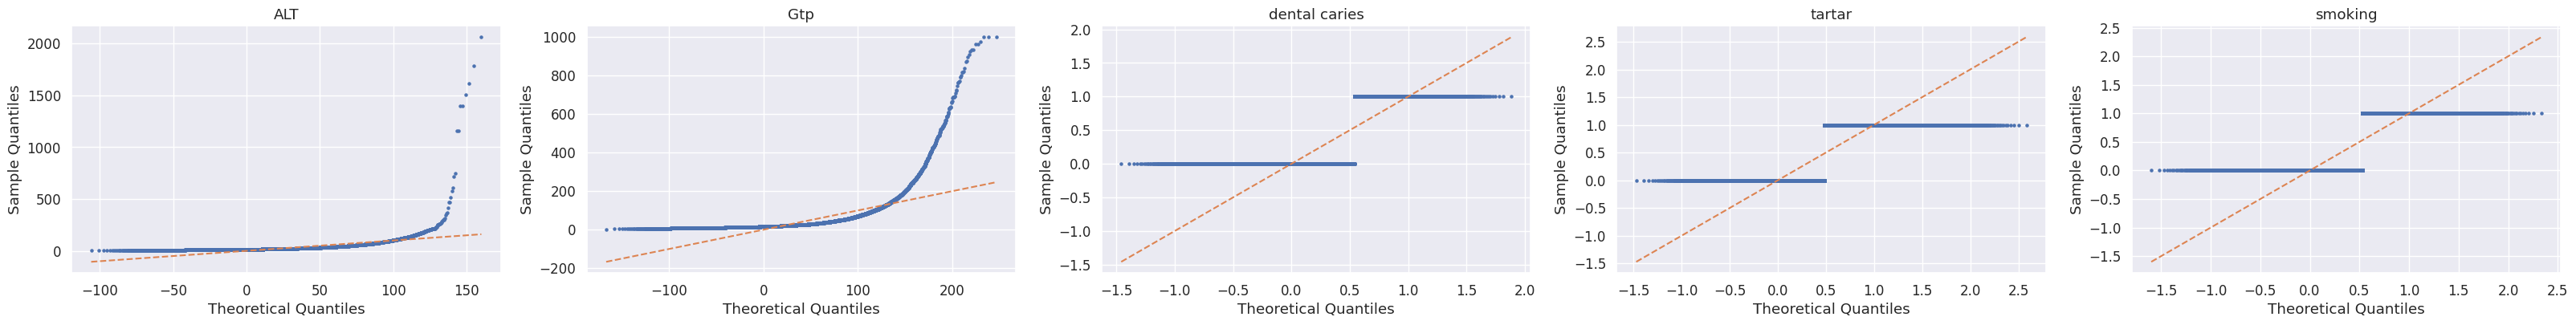

In [ ]:
from scipy import stats

for j in range(5, 26, 5):
    category_range = categories[j-5:j]

    # Histogram and Normal Distribution Plot
    fig, axes = plt.subplots(ncols=len(category_range))
    fig.set_size_inches(8 * len(category_range), 4)
    axes = axes.flatten()

    for i, category in enumerate(category_range):
        ax = axes[i]
        samples = df[category]

        ax.hist(samples, density=True, bins=23)

        loc = samples.mean()
        scale = samples.std()

        x_left, x_right = ax.get_xlim()
        x = np.linspace(x_left, x_right, 10000)
        y = stats.norm.pdf(x, loc=loc, scale=scale)

        ax.plot(x, y, linestyle='dashed')
        ax.set_title(category)

    # Quantile-Quantile Plot
    fig, axes = plt.subplots(ncols=len(category_range))
    fig.set_size_inches(8 * len(category_range), 4)
    axes = axes.flatten()

    for i, category in enumerate(category_range):
        ax = axes[i]
        samples = df[category]

        loc = samples.mean()
        scale = samples.std()

        interval = np.linspace(0, 1, samples.shape[0])[1:-1]
        x = stats.norm.ppf(interval, loc=loc, scale=scale)
        y = np.quantile(samples, interval)

        ax.scatter(x, y, s=5)
        ax.plot(x, x, color='C1', linestyle='dashed')

        ax.set_title(category)
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Sample Quantiles')


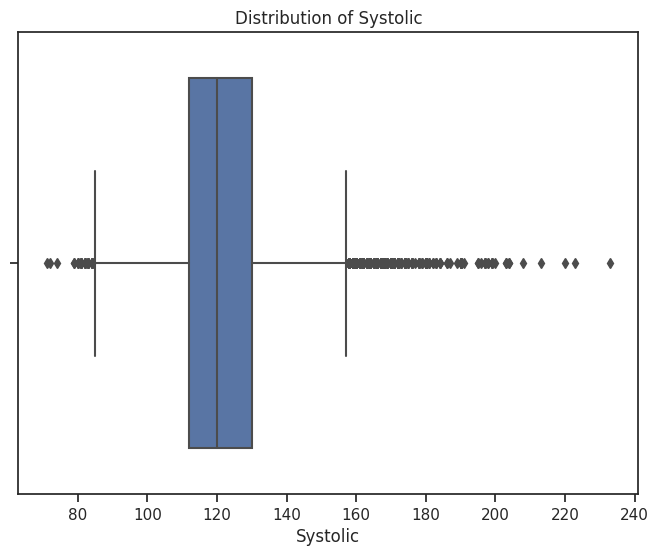

In [ ]:
sns.set(style="ticks")

plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='systolic')

plt.title('Distribution of Systolic')
plt.xlabel('Systolic')

plt.show()

In [ ]:
df[df['systolic'] > 190]['smoking'].value_counts()

1    13
0    11
Name: smoking, dtype: Int64

При систолическом давлении > 180 у человека начинается сложная гипертония, что приводит к смерти. Следовательно, данные более 190 можно отбросить как выбросы.

In [ ]:
indexes_drop = df[df['systolic'] > 190].index
df = df.drop(indexes_drop)

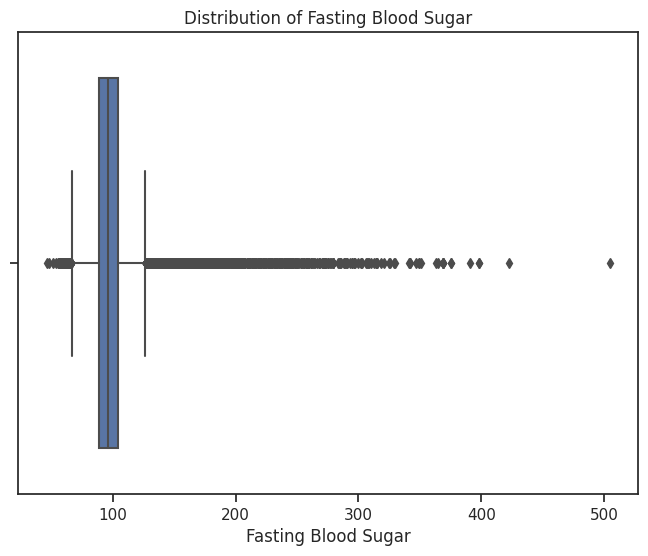

In [ ]:
sns.set(style="ticks")

plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='fasting blood sugar')

plt.title('Distribution of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar') # Посмотреть, к какому классу принадлежат выбросы.

plt.show()

In [ ]:
df[df['fasting blood sugar'] > 350]['smoking'].value_counts()

1    12
0     2
Name: smoking, dtype: Int64

Эти данные, скорее всего, не являются выбросами. Так как люди, с более высоким уровнем сахара в крови, в большинстве своём - курильщики.

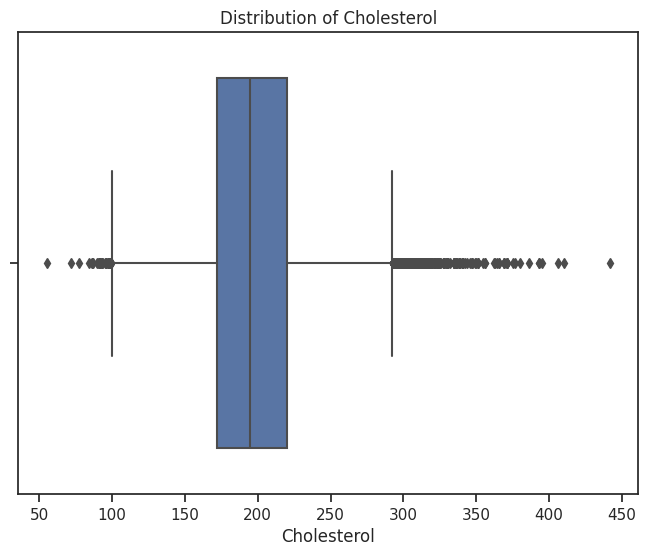

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='Cholesterol')

plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')

plt.show()

In [ ]:
df[(df['Cholesterol'] > 390) | (df['Cholesterol'] < 70)]['smoking'].value_counts()

0    5
1    2
Name: smoking, dtype: Int64

In [ ]:
indexes_drop = df[(df['Cholesterol'] > 390) | (df['Cholesterol'] < 70)].index
df = df.drop(indexes_drop)

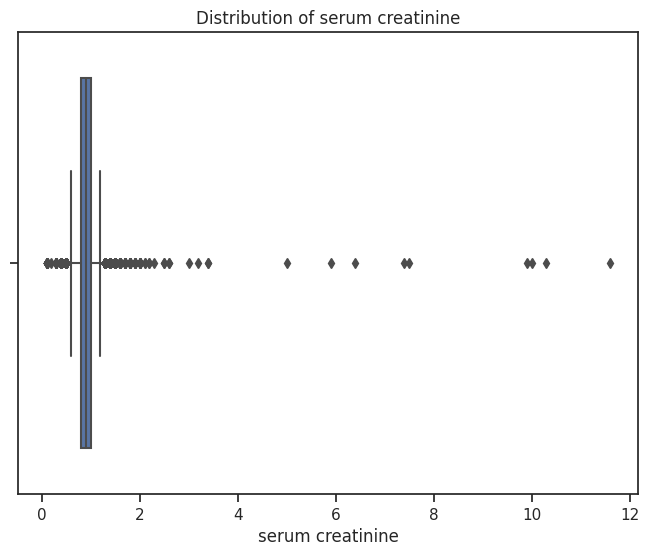

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='serum creatinine')

plt.title('Distribution of serum creatinine')
plt.xlabel('serum creatinine')

plt.show()

In [ ]:
df[df['serum creatinine'] > 4]['smoking'].value_counts()

0    5
1    4
Name: smoking, dtype: Int64

In [ ]:
indexes_drop = df[df['serum creatinine'] > 4].index
df = df.drop(indexes_drop)

Выполняем предварительную обработку данных путем удаления столбцов 'ID' и 'smoking' из DataFrame df, а также генерируем случайную перестановку индексов строк.

В контексте логистической регрессии, случайная перестановка индексов может быть полезной, чтобы уменьшить возможное смещение или корреляцию в данных, а также для оценки стабильности и вариативности модели.

In [ ]:
np.random.seed(12)  # Задаем зерно для генерации псевдослучайных чисел, чтобы результаты были воспроизводимыми
shuffle_index = np.random.permutation(df.shape[0])  # Перемешиваем индексы строк DataFrame случайным образом
y = df['smoking']  # Создаем переменную y, содержащую столбец 'smoking' в качестве целевой переменной
y_1 = y.copy()  # Создаем копию переменной y для дальнейшего использования
df = df.drop('ID', axis=1)  # Удаляем столбец 'ID' из DataFrame
df = df.drop('smoking', axis=1)  # Удаляем столбец 'smoking' из DataFrame

Разделяем исходные данные на обучающую и тестовую выборки для признаков (`x_train`, `x_test`) и целевой переменной (`y_train`, `y_test`) на основе заданной доли (`prop`). Обучающая выборка будет содержать первые 70% данных, а тестовая выборка - оставшиеся 30% данных.

In [ ]:
prop = 0.7  # Доля данных для обучения модели
train_test_cut = int(len(df) * prop)  # Вычисляем индекс разделения данных на обучающую и тестовую выборки

# Разделяем данные на обучающую и тестовую выборки
x_train = df[:train_test_cut]  # Обучающая выборка для признаков (x)
x_test = df[train_test_cut:]  # Тестовая выборка для признаков (x)
y_train = y[:train_test_cut]  # Обучающая выборка для целевой переменной (y)
y_test = y[train_test_cut:]  # Тестовая выборка для целевой переменной (y)

In [ ]:
x_train_t = x_train.transpose()  # Транспонируем обучающую выборку признаков (x_train)
x_test_t = x_test.transpose()  # Транспонируем тестовую выборку признаков (x_test)

# Нормировка
Выполним масштабирование признаков в обучающей и тестовой выборках с использованием метода стандартизации.

Функция `scaler` позволяет масштабировать значения столбца признаков в тестовой выборке на основе статистических характеристик этого столбца в обучающей выборке, чтобы обеспечить сопоставимые значения признаков в обоих выборках при использовании модели.

Масштабирование - это процесс преобразования значений признаков, чтобы они находились в определенном диапазоне или имели определенные свойства.

Масштабирование выполняется для того, чтобы привести значения признаков к одному и тому же диапазону или шкале. Это позволяет избежать проблем, которые могут возникнуть при использовании признаков с разными масштабами или единицами измерения.

Существуют два распространенных метода масштабирования:

- Масштабирование на основе среднего значения и стандартного отклонения (стандартизация): В этом методе каждое значение признака вычитается из его среднего значения и делится на стандартное отклонение. Это приводит к тому, что значения признаков имеют среднее значение равное 0 и стандартное отклонение равное 1.

- Масштабирование на основе минимума и максимума (нормализация): В этом методе каждое значение признака вычитается из его минимального значения и делится на разницу между максимальным и минимальным значениями. Это приводит к тому, что значения признаков находятся в диапазоне от 0 до 1.

In [ ]:
def scaler(data_train, data_test, name_col):
    m = data_train[name_col].mean()  # Среднее значение столбца признаков в обучающей выборке
    std = data_train[name_col].std()  # Стандартное отклонение столбца признаков в обучающей выборке
    return (data_test[name_col] - m) / std  # Масштабирование значений столбца признаков в тестовой выборке

scaled = x_train.copy()  # Создаем копию обучающей выборки признаков для масштабирования
for column in x_train:
    scaled[column] = scaler(x_train, scaled, column)  # Масштабируем столбец признаков в обучающей выборке

test_scaled = x_test.copy()  # Создаем копию тестовой выборки признаков для масштабирования
for column in test_scaled:
    test_scaled[column] = scaler(x_train, x_test, column)  # Масштабируем столбец признаков в тестовой выборке

In [ ]:
scaled

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0.754264,0.891714,0.577104,-0.458362,-0.224715,-0.450922,-0.415232,-0.163159,-0.163159,1.213463,...,-0.155075,0.878346,0.754275,-0.216711,0.590644,-0.273020,-0.320624,-0.354060,-0.520735,-1.11754
1,0.754264,-0.347799,0.036601,0.319340,0.638090,1.057475,0.970651,-0.163159,-0.163159,-1.583913,...,-0.840520,2.704277,0.049314,-0.216711,0.590644,-0.377894,-0.035273,-0.431916,-0.520735,0.894794
2,-1.325753,-0.347799,-1.044404,-0.458362,0.422389,-0.019952,-0.019265,-0.163159,-0.163159,-0.111610,...,0.324737,-0.192866,-1.360610,-0.216711,-1.474597,-0.535205,-0.377694,-0.354060,-0.520735,-1.11754
3,0.754264,-1.174140,1.658110,0.708191,0.314538,0.411019,0.376701,-0.163159,-0.163159,0.477311,...,-0.634887,0.342740,1.010625,-0.216711,1.623264,-0.430331,-0.006738,-0.139957,-0.520735,0.894794
4,0.754264,-0.347799,-0.503902,-0.458362,0.368464,-0.019952,-0.019265,-0.163159,-0.163159,-0.406070,...,-0.155075,1.024421,1.523324,-0.216711,-0.958287,-0.273020,-0.006738,-0.023173,1.920302,0.894794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31183,0.754264,2.544397,-0.503902,-0.458362,-0.440417,-1.097378,-0.811198,-0.163159,-0.163159,2.832996,...,0.667460,0.147974,0.946538,-0.216711,1.623264,-0.063273,-0.377694,1.027882,-0.520735,-1.11754
31184,-1.325753,1.304884,-0.503902,0.708191,1.069493,-0.019952,-0.415232,-0.163159,-0.163159,0.698157,...,-0.292164,-0.777164,-0.655648,-0.216711,-0.441976,-0.115710,-0.292089,0.794315,-0.520735,-1.11754
31185,0.754264,0.891714,-0.503902,-0.458362,-0.763969,0.411019,0.376701,-0.163159,-0.163159,0.624541,...,0.393281,2.266053,0.305663,-0.216711,0.590644,0.041601,-0.092344,-0.315132,-0.520735,-1.11754
31186,0.754264,0.891714,1.117607,1.097042,0.929287,0.411019,-0.415232,-0.163159,-0.163159,-1.289452,...,-0.909065,0.513160,-0.078861,-0.216711,2.139575,-0.325457,-0.292089,-0.334596,1.920302,0.894794


Создаем, обучаем и оцениваем модель логистической регрессии с помощью масштабированных данных, а также вычисляем оценку производительности модели с использованием перекрестной проверки.

Перекрестная проверка (cross-validation) - это метод оценки производительности модели машинного обучения на основе доступных данных путем разделения данных на несколько непересекающихся подмножеств (фолдов) для обучения и тестирования модели.

Основная цель перекрестной проверки заключается в том, чтобы получить более надежную оценку производительности модели, особенно когда размер данных ограничен. Это позволяет оценить, насколько модель может обобщаться на новые наблюдения, которые не были использованы в процессе обучения.

Перекрестная проверка позволяет более объективно оценить производительность модели, так как каждый набор данных используется как обучающий и тестовый набор одинаковое количество раз. Она помогает выявить проблемы переобучения (overfitting) или недообучения (underfitting) модели и выбрать более оптимальные параметры модели или алгоритма обучения.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(random_state=42)
model.fit(scaled, y_train)  # Обучаем модель на масштабированной обучающей выборке

pred = model.predict(test_scaled)  # Получаем предсказания модели на масштабированной тестовой выборке

scores = cross_val_score(model, test_scaled, y_test, groups=y_test, cv=5, scoring='f1_micro')

In [ ]:
scores

array([0.74840884, 0.73605391, 0.74766005, 0.75814302, 0.73867465])

Выполняем масштабирование обучающей и тестовой выборок с использованием MinMaxScaler, создаем и обучаем модель логистической регрессии, генерируем предсказания на масштабированной тестовой выборке и вычисляем оценки производительности модели с использованием перекрестной проверки. Результаты предсказаний модели сохраняются в переменной pred, а оценки производительности на каждом фолде - в переменной scores.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Масштабирование обучающей выборки
mm_scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(mm_scaler.fit_transform(x_train), columns=x_train.columns)

# Масштабирование тестовой выборки
x_test_scaled = pd.DataFrame(mm_scaler.transform(x_test), columns=x_test.columns)

# Создание и обучение модели логистической регрессии
model = LogisticRegression(random_state=0)
model.fit(x_train_scaled, y_train)

# Предсказание на масштабированной тестовой выборке
pred = model.predict(x_test_scaled)

# Оценка модели с использованием кросс-валидации
scores = cross_val_score(model, x_test_scaled, y_test, groups=y_test, cv=5, scoring='f1_micro')
scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.74915762, 0.73343317, 0.74241857, 0.74840884, 0.73904905])

In [ ]:
x_train_scaled

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,1.0,0.538462,0.666667,0.285714,0.355263,0.071429,0.071429,0.0,0.0,0.563025,...,0.143662,0.082919,0.68125,0.0,0.272727,0.011494,0.005149,0.020060,0.0,0.0
1,1.0,0.307692,0.583333,0.380952,0.460526,0.142857,0.142857,0.0,0.0,0.243697,...,0.115493,0.124378,0.61250,0.0,0.272727,0.009962,0.008582,0.016048,0.0,1.0
2,0.0,0.307692,0.416667,0.285714,0.434211,0.091837,0.091837,0.0,0.0,0.411765,...,0.163380,0.058596,0.47500,0.0,0.151515,0.007663,0.004463,0.020060,0.0,0.0
3,1.0,0.153846,0.833333,0.428571,0.421053,0.112245,0.112245,0.0,0.0,0.478992,...,0.123944,0.070757,0.70625,0.0,0.333333,0.009195,0.008926,0.031093,0.0,1.0
4,1.0,0.307692,0.500000,0.285714,0.427632,0.091837,0.091837,0.0,0.0,0.378151,...,0.143662,0.086235,0.75625,0.0,0.181818,0.011494,0.008926,0.037111,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31154,1.0,0.846154,0.500000,0.285714,0.328947,0.040816,0.051020,0.0,0.0,0.747899,...,0.177465,0.066335,0.70000,0.0,0.333333,0.014559,0.004463,0.091274,0.0,0.0
31155,0.0,0.615385,0.500000,0.428571,0.513158,0.091837,0.071429,0.0,0.0,0.504202,...,0.138028,0.045329,0.54375,0.0,0.212121,0.013793,0.005493,0.079238,0.0,0.0
31156,1.0,0.538462,0.500000,0.285714,0.289474,0.112245,0.112245,0.0,0.0,0.495798,...,0.166197,0.114428,0.63750,0.0,0.272727,0.016092,0.007896,0.022066,0.0,0.0
31157,1.0,0.538462,0.750000,0.476190,0.496053,0.112245,0.071429,0.0,0.0,0.277311,...,0.112676,0.074627,0.60000,0.0,0.363636,0.010728,0.005493,0.021063,1.0,1.0


# Тест

In [ ]:
test = pd.read_csv('smoking_test.csv')

In [ ]:
test

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,48715,M,40.0,180,75.0,85.0,1.0,1.2,1.0,1.0,...,145.0,14.5,1.0,1.0,17.0,18.0,30.0,Y,0,N
1,49650,M,25.0,180,75.0,83.8,0.8,1.2,1.0,1.0,...,99.0,15.3,1.0,0.9,18.0,14.0,22.0,Y,0,Y
2,18013,F,50.0,155,65.0,86.3,0.3,1.2,1.0,1.0,...,120.0,13.4,1.0,0.7,19.0,21.0,13.0,Y,0,N
3,24282,F,40.0,155,45.0,74.0,1.2,1.0,1.0,1.0,...,105.0,13.6,1.0,0.6,18.0,16.0,16.0,Y,0,Y
4,9215,M,30.0,175,70.0,79.0,0.8,1.2,1.0,1.0,...,57.0,16.6,1.0,0.9,18.0,11.0,22.0,Y,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,20787,F,50.0,160,55.0,66.2,0.6,0.4,1.0,1.0,...,178.0,12.5,1.0,0.8,22.0,17.0,16.0,Y,0,N
11134,5000,M,30.0,165,65.0,76.0,1.0,1.5,1.0,1.0,...,147.0,14.9,1.0,1.1,32.0,31.0,19.0,Y,0,Y
11135,36617,F,70.0,145,50.0,81.0,0.8,0.9,1.0,1.0,...,80.0,14.9,1.0,0.7,36.0,32.0,19.0,Y,0,N
11136,38229,M,40.0,175,80.0,82.2,0.7,0.5,1.0,1.0,...,110.0,18.0,1.0,1.2,36.0,52.0,71.0,Y,1,Y


In [ ]:
test_ids = test['ID']  # Сохраняем столбец 'ID' из DataFrame 'test' в переменную 'test_ids'
test = test.drop(['ID', 'oral'], axis=1)  # Удаляем столбцы 'ID' и 'oral' из DataFrame 'test'

# Заменяем значения в столбцах 'gender' и 'tartar' на числовые значения 1 и 0
test.loc[test['gender'] == 'M', 'gender'] = 1
test.loc[test['gender'] == 'F', 'gender'] = 0
test.loc[test['tartar'] == 'Y', 'tartar'] = 1
test.loc[test['tartar'] == 'N', 'tartar'] = 0

# Преобразуем столбец 'gender' в тип данных 'Int64'
test = test.astype({"gender": "Int64"})

# Преобразуем столбец 'tartar' в тип данных 'Int64'
test = test.astype({"tartar": "Int64"})

# Заменяем пропущенные значения в DataFrame 'test' средними значениями по столбцам
for column in test.columns:
    test[column].fillna(test[column].mean(), inplace=True)

In [ ]:
test

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,1,40.0,180,75.0,85.0,1.0,1.2,1.0,1.0,128.0,...,55.0,145.0,14.5,1.0,1.0,17.0,18.0,30.0,0,0
1,1,25.0,180,75.0,83.8,0.8,1.2,1.0,1.0,116.0,...,48.0,99.0,15.3,1.0,0.9,18.0,14.0,22.0,0,1
2,0,50.0,155,65.0,86.3,0.3,1.2,1.0,1.0,101.0,...,57.0,120.0,13.4,1.0,0.7,19.0,21.0,13.0,0,0
3,0,40.0,155,45.0,74.0,1.2,1.0,1.0,1.0,104.0,...,64.0,105.0,13.6,1.0,0.6,18.0,16.0,16.0,0,1
4,1,30.0,175,70.0,79.0,0.8,1.2,1.0,1.0,119.0,...,98.0,57.0,16.6,1.0,0.9,18.0,11.0,22.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,0,50.0,160,55.0,66.2,0.6,0.4,1.0,1.0,118.0,...,92.0,178.0,12.5,1.0,0.8,22.0,17.0,16.0,0,0
11134,1,30.0,165,65.0,76.0,1.0,1.5,1.0,1.0,130.0,...,57.0,147.0,14.9,1.0,1.1,32.0,31.0,19.0,0,1
11135,0,70.0,145,50.0,81.0,0.8,0.9,1.0,1.0,120.0,...,61.0,80.0,14.9,1.0,0.7,36.0,32.0,19.0,0,0
11136,1,40.0,175,80.0,82.2,0.7,0.5,1.0,1.0,130.0,...,39.0,110.0,18.0,1.0,1.2,36.0,52.0,71.0,1,1


In [ ]:
ans_scaled = test.copy()  # Создаем копию DataFrame 'test' для масштабирования
for column in ans_scaled:
    ans_scaled[column] = scaler(x_train, test, column)  # Масштабируем столбец 'test' с использованием функции 'scaler'

y_a = model.predict(ans_scaled)  # Предсказываем значения на масштабированной тестовой выборке 'ans_scaled'

ans = pd.DataFrame()  # Создаем новый DataFrame для ответов
ans['ID'] = test_ids  # Добавляем столбец 'ID' из 'test_ids' в DataFrame 'ans'
ans['smoking'] = y_a  # Добавляем предсказанные значения 'y_a' в столбец 'smoking' DataFrame 'ans'

ans.loc[ans['smoking'] == 1, 'smoking'] = 'yes'  # Заменяем значения 1 на 'yes'
ans.loc[ans['smoking'] == 0, 'smoking'] = 'no'  # Заменяем значения 0 на 'no'

ans.to_csv('output.csv', sep=',', index=False)  # Сохраняем DataFrame 'ans' в файл 'output.csv'
ans

,ID,smoking
0,48715,no
1,49650,no
2,18013,no
3,24282,no
4,9215,yes
...,...,...
11133,20787,no
11134,5000,no
11135,36617,no
11136,38229,yes


Confusion matrix (матрица ошибок или матрица неточностей) - это инструмент для оценки производительности классификационных моделей машинного обучения. Она предоставляет информацию о том, как модель классифицирует примеры данных и позволяет анализировать различные виды ошибок, которые модель может совершать.

Confusion matrix обычно представляется в виде квадратной матрицы, где каждая строка соответствует фактическому классу примеров, а каждый столбец соответствует прогнозируемому классу модели. Он содержит четыре основных элемента:

> True Positive (TP) - количество примеров, которые модель правильно классифицировала как положительные (верно-положительные).

> True Negative (TN) - количество примеров, которые модель правильно классифицировала как отрицательные (верно-отрицательные).

> False Positive (FP) - количество примеров, которые модель неправильно классифицировала как положительные (ложно-положительные). Также называют ошибкой первого рода.

> False Negative (FN) - количество примеров, которые модель неправильно классифицировала как отрицательные (ложно-отрицательные). Также называют ошибкой второго рода.

```mathematica
                Predicted Negative   Predicted Positive
Actual Negative      TN                     FP
Actual Positive      FN                     TP
```

Confusion matrix является полезным инструментом для анализа производительности моделей классификации и помогает понять, какие ошибки они могут совершать и насколько надежными являются их прогнозы.

- Accuracy (точность) - это метрика, которая измеряет долю правильно классифицированных примеров от общего числа примеров. Значение 0.92 для accuracy означает, что модель правильно классифицировала 92% примеров.

- Precision (точность) - это метрика, которая измеряет долю правильно классифицированных положительных примеров среди всех примеров, которые модель отнесла к положительному классу. Значение 0.34 для precision означает, что только 34% примеров, которые модель отнесла к положительному классу, действительно являются положительными.

- Recall (полнота) - это метрика, которая измеряет долю правильно классифицированных положительных примеров от общего числа истинно положительных примеров. Значение 0.25 для recall означает, что модель правильно обнаружила только 25% истинно положительных примеров из всех таких примеров.

В контексте этих значений, можно сделать следующие предположения:

- Высокое значение accuracy (0.92) указывает на то, что модель в целом дает правильные предсказания с высокой долей верности.
- Низкое значение precision (0.34) может означать, что модель имеет тенденцию ошибочно классифицировать примеры как положительные, когда они на самом деле относятся к отрицательному классу.
- Низкое значение recall (0.25) может указывать на то, что модель пропускает множество истинно положительных примеров, классифицируя их как отрицательные.

Такие значения метрик accuracy, precision и recall могут возникать в различных ситуациях в зависимости от характеристик данных и особенностей модели.

> Дисбаланс классов: Если классы в данных сильно несбалансированы, то модель может иметь высокую точность (accuracy) за счет правильной классификации большого числа примеров в мажоритарном классе, но при этом показывать низкую полноту (recall) для миноритарного класса. Например, если положительные примеры составляют всего 10% от всех примеров, то модель может склоняться к отношению всех примеров к отрицательному классу, чтобы достичь высокой точности.

> Проблемы в качестве данных: Низкое значение precision может возникнуть, когда модель недостаточно обучена на данных и делает ложно-положительные предсказания. Например, если в обучающих данных присутствует шум или несоответствия, модель может ошибочно классифицировать примеры.

> Неправильный выбор порога: Метрики precision и recall зависят от выбора порога вероятности или решающего правила для классификации. Различные значения порога могут привести к разным значениям этих метрик. Например, более консервативное (высокое) значение порога может повысить точность, но снизить полноту.